In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [103]:
pd.options.display.max_columns = 150
df=pd.read_csv(r"C:\Users\vamsi\Desktop\Interview\Music_Data.csv")
df.drop(columns=['Unnamed: 0','key'],inplace=True)
df.head()

Popularity  danceability  energy  loudness  speechiness  acousticness  \
0        60.0         0.854   0.564    -4.964       0.0485      0.017100   
1        54.0         0.382   0.814    -7.230       0.0406      0.001100   
2        35.0         0.434   0.614    -8.334       0.0525      0.486000   
3        66.0         0.853   0.597    -6.528       0.0555      0.021200   
4        53.0         0.167   0.975    -4.279       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  
0               NaN    0.0849   0.8990  134.071            234596.0  
1          0.004010    0.1010   0.5690  116.454            251733.0  
2          0.000196    0.3940   0.7870  147.681            109667.0  
3               NaN    0.1220   0.5690  107.033            173968.0  
4          0.016100    0.1720   0.0918  199.060            229960.0

In [104]:
df.columns

Index(['Popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          17568 non-null  float64
 1   danceability        17996 non-null  float64
 2   energy              17996 non-null  float64
 3   loudness            17996 non-null  float64
 4   speechiness         17996 non-null  float64
 5   acousticness        17996 non-null  float64
 6   instrumentalness    13619 non-null  float64
 7   liveness            17996 non-null  float64
 8   valence             17996 non-null  float64
 9   tempo               17996 non-null  float64
 10  duration_in min/ms  17996 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


In [106]:
print('Is there any missing value? ', df.isnull().values.any())
print('How many missing values? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

Is there any missing value?  True
How many missing values?  4805
Number of participants after eliminating missing values:  13306


In [107]:
df.head()

Popularity  danceability  energy  loudness  speechiness  acousticness  \
1        54.0         0.382   0.814    -7.230       0.0406      0.001100   
2        35.0         0.434   0.614    -8.334       0.0525      0.486000   
4        53.0         0.167   0.975    -4.279       0.2160      0.000169   
5        53.0         0.235   0.977     0.878       0.1070      0.003530   
6        48.0         0.674   0.658    -9.647       0.1040      0.404000   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  
1          0.004010    0.1010   0.5690  116.454            251733.0  
2          0.000196    0.3940   0.7870  147.681            109667.0  
4          0.016100    0.1720   0.0918  199.060            229960.0  
5          0.006040    0.1720   0.2410  152.952            208133.0  
6          0.000001    0.0981   0.6770  143.292            329387.0

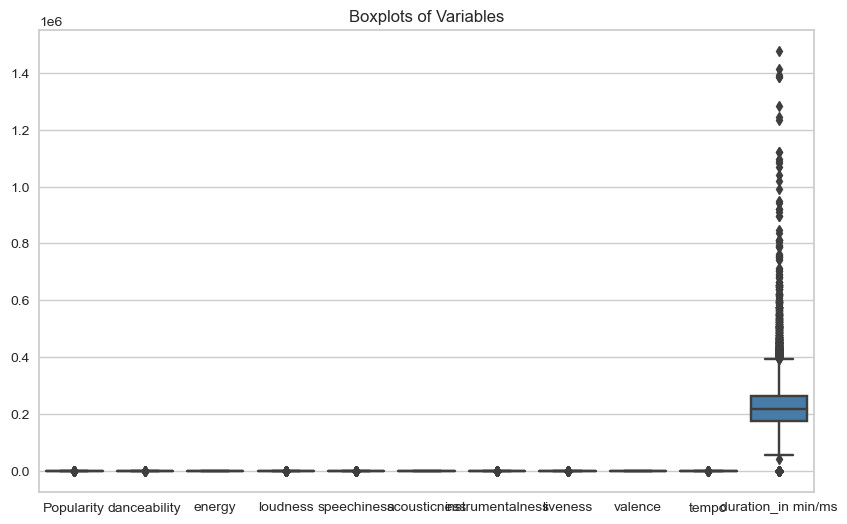

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette="Set1")
plt.title('Boxplots of Variables')
plt.show()

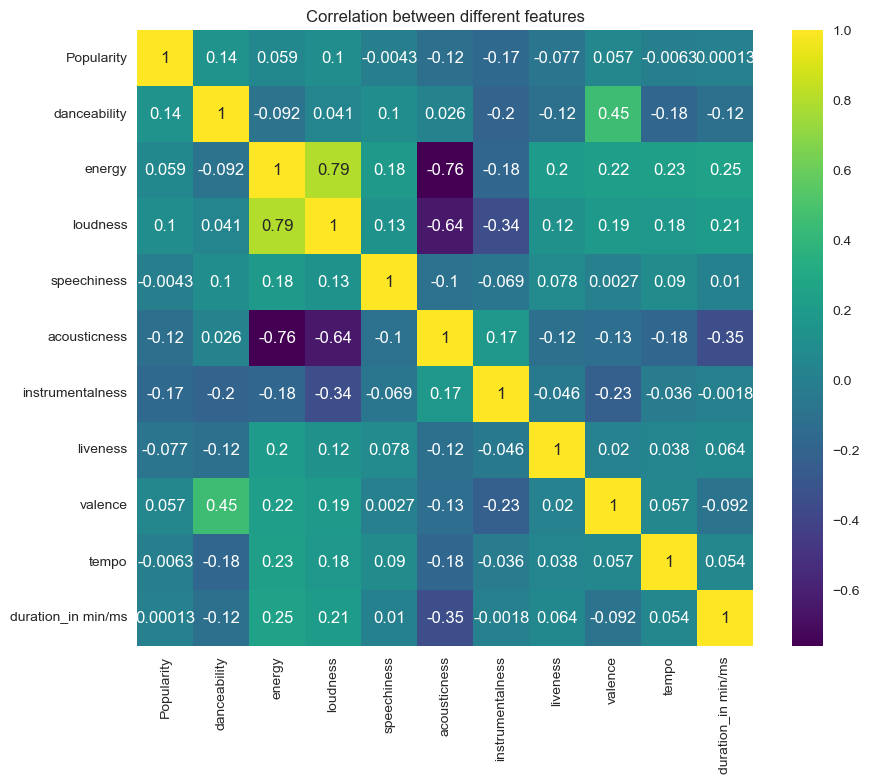

In [108]:
corr=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different features')
plt.show()

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [53]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(df))

## PCA

In [54]:
eigenvalues, eigenvectors = np.linalg.eig(corr)

sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

total_variance = np.sum(explained_variance_ratio)
variance_to_retain = 0.90
cumulative_variance = np.cumsum(explained_variance_ratio)

In [55]:
# Create a DataFrame to hold the table
dt = {'Principal Component': ['PC{}'.format(i) for i in range(1, len(eigenvalues) + 1)],
        'Eigenvalues': eigenvalues,
        'Proportion': explained_variance_ratio,
        'Cumulative': cumulative_variance}

df_table = pd.DataFrame(dt)

# Display the table
df_table


Principal Component  Eigenvalues  Proportion  Cumulative
0                  PC1     2.907508    0.264319    0.264319
1                  PC2     1.702404    0.154764    0.419083
2                  PC3     1.094368    0.099488    0.518571
3                  PC4     0.987102    0.089737    0.608308
4                  PC5     0.955783    0.086889    0.695197
5                  PC6     0.914418    0.083129    0.778326
6                  PC7     0.772586    0.070235    0.848561
7                  PC8     0.758000    0.068909    0.917470
8                  PC9     0.448946    0.040813    0.958283
9                 PC10     0.320494    0.029136    0.987419
10                PC11     0.138391    0.012581    1.000000

In [56]:
eigenvalue_diff = abs(np.diff(eigenvalues))
dt['Eigenvalue Difference'] = [np.nan] + eigenvalue_diff.tolist()
df_table = pd.DataFrame(dt)

# Display the table
df_table

Principal Component  Eigenvalues  Proportion  Cumulative  \
0                  PC1     2.907508    0.264319    0.264319   
1                  PC2     1.702404    0.154764    0.419083   
2                  PC3     1.094368    0.099488    0.518571   
3                  PC4     0.987102    0.089737    0.608308   
4                  PC5     0.955783    0.086889    0.695197   
5                  PC6     0.914418    0.083129    0.778326   
6                  PC7     0.772586    0.070235    0.848561   
7                  PC8     0.758000    0.068909    0.917470   
8                  PC9     0.448946    0.040813    0.958283   
9                 PC10     0.320494    0.029136    0.987419   
10                PC11     0.138391    0.012581    1.000000   

    Eigenvalue Difference  
0                     NaN  
1                1.205103  
2                0.608036  
3                0.107266  
4                0.031319  
5                0.041365  
6                0.141832  
7                0.014586  
8                0.309054  
9                0.128452  
10               0.182103

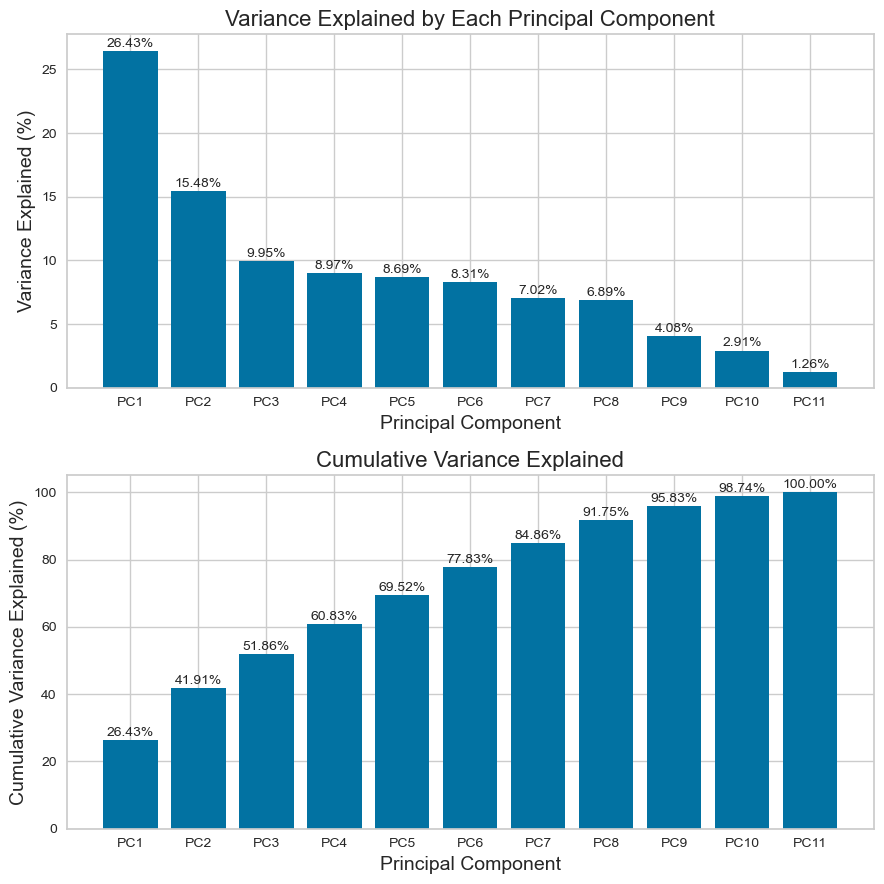

In [58]:
# Labels for the bars
labels = ['PC{}'.format(i) for i in range(1, 12)]

variance_percentage = explained_variance_ratio * 100
cumulative_percentage = np.cumsum(variance_percentage)

# Increase the size of the figure
fig, axs = plt.subplots(2, 1, figsize=(9, 9))

# Create pastel colors for the bars
#pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFDB4D', '#B3B3CC', '#99FFCC', '#FF6666', '#C2F0C2', '#FFB3E6', '#C2F0F0']

# Plot the first bar graph (variance explained)
variance_bars = axs[0].bar(labels, variance_percentage)
axs[0].set_title('Variance Explained by Each Principal Component', fontsize=16)  # Increase title size
axs[0].set_ylabel('Variance Explained (%)', fontsize=14)  # Increase y-label size
axs[0].set_xlabel('Principal Component', fontsize=14)  # Increase x-label size

# Add percentage values on top of the bars
for bar, percentage in zip(variance_bars, variance_percentage):
    height = bar.get_height()
    axs[0].annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

# Plot the second bar graph (cumulative variance explained)
cumulative_bars = axs[1].bar(labels, cumulative_percentage)
axs[1].set_title('Cumulative Variance Explained', fontsize=16)  # Increase title size
axs[1].set_ylabel('Cumulative Variance Explained (%)', fontsize=14)  # Increase y-label size
axs[1].set_xlabel('Principal Component', fontsize=14)  # Increase x-label size

# Add percentage values on top of the bars
for bar, percentage in zip(cumulative_bars, cumulative_percentage):
    height = bar.get_height()
    axs[1].annotate(f'{percentage:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [59]:
# Select the top 'num_components_to_retain' eigenvectors
num_components_to_retain = 8
selected_eigenvectors1 = eigenvectors[:, :num_components_to_retain]
projected_data = np.dot(data, selected_eigenvectors1)

In [60]:
import pandas as pd
import numpy as np
from IPython.display import HTML

# Extract the first six PCs
pcs = projected_data
col=['PC{}'.format(i) for i in range(1, len(pcs[0]) + 1)]
# Create an empty DataFrame to store correlations
correlation_df = pd.DataFrame(columns=col, index=df.columns)

# Calculate correlations for each PC
for i, pc in enumerate(col):
    correlations = np.corrcoef(data.values.T, pcs[:, i])
    correlation_df[pc] = correlations[-1, :-1]  # Extract correlations with X variables

# Create a function to format the DataFrame cell with red text for bold values
def highlight_high_correlations(val):
    color = 'color: red; font-weight: bold' if abs(val) >= 0.5 else ''
    return f'{color}'

# Apply the formatting to the entire DataFrame
styled_correlation_df = correlation_df.style.applymap(highlight_high_correlations)

# Display the styled correlation table
display(styled_correlation_df)


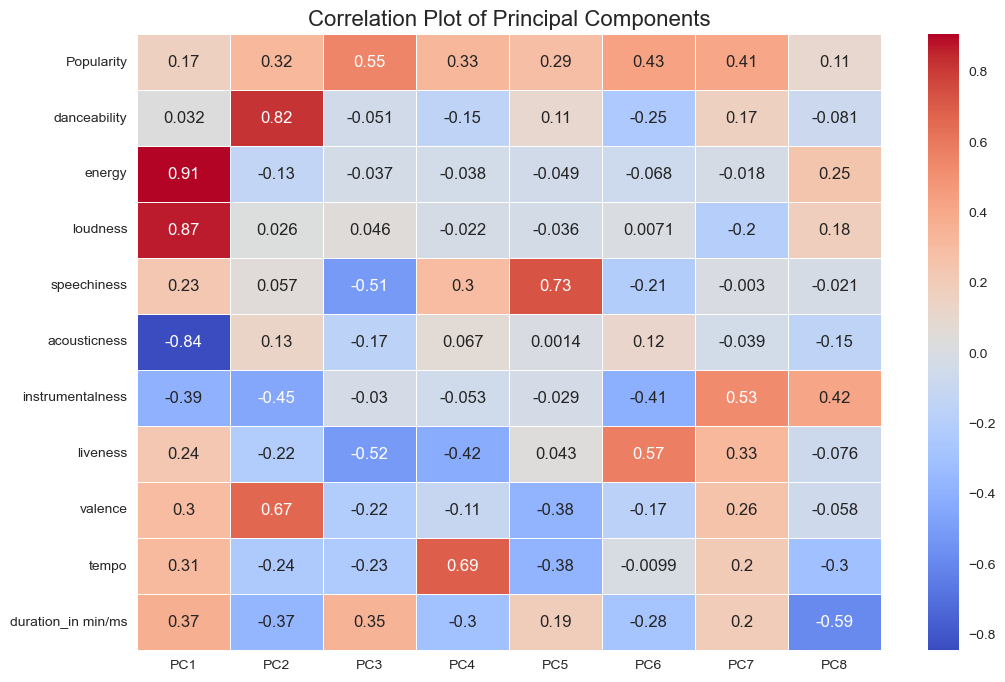

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot of Principal Components', fontsize=16)
plt.show()

In [62]:
df_pca_fit= pd.DataFrame(projected_data,columns=col)
df_pca_fit

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.958718 -0.087228  1.098384  0.114724 -0.281903  0.211186 -0.305444   
1     -0.107325  0.364557 -1.559587  0.128708 -1.314063  1.096513  0.121758   
2      2.169552 -2.401310 -0.648850  3.074236  1.103543  0.516988 -0.532500   
3      2.362139 -1.526188  0.342226  1.396266  0.225434  0.756638 -0.968760   
4      0.219321  1.021208  0.093083  0.531918  0.165729 -0.709990  0.414034   
...         ...       ...       ...       ...       ...       ...       ...   
13301 -4.108767 -2.584082 -0.259497  1.805131 -0.798257 -0.163975  0.827295   
13302 -2.606139  0.781568  0.495104 -1.254362  0.426937 -0.338467 -1.384101   
13303  1.723522 -0.824447 -1.283611 -1.871446  0.500400  1.660700 -0.064713   
13304 -0.376975 -2.713911 -0.968116  0.187641  0.303105 -1.009370  1.049038   
13305  1.147638 -1.025250 -0.311478  0.078829 -0.336581  0.691180  0.050213   

            PC8  
0      0.114005  
1     -0.364893  
2     -0.252825  
3      0.612719  
4     -1.434759  
...         ...  
13301 -0.630790  
13302 -0.947562  
13303  0.290906  
13304  1.144037  
13305  0.554691  

[13306 rows x 8 columns]

In [18]:
## Clustering

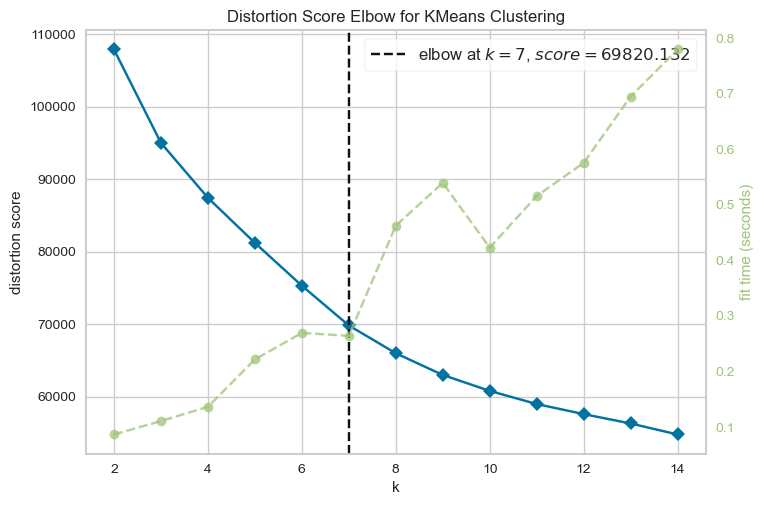

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans1 = KMeans()
visualizer = KElbowVisualizer(kmeans1, k=(2,15))
visualizer.fit(df_pca_fit)
visualizer.poof()

In [64]:
k_means_pca = KMeans(n_clusters = 7)
k_fit_pca = k_means_pca.fit(df_pca_fit)
centroids = k_fit_pca.cluster_centers_

In [65]:
pd.options.display.max_columns = 10
predictions = k_fit_pca.labels_
df_pca_fit['Clusters'] = predictions
df_pca_fit.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.958718 -0.087228  1.098384  0.114724 -0.281903  0.211186 -0.305444   
1 -0.107325  0.364557 -1.559587  0.128708 -1.314063  1.096513  0.121758   
2  2.169552 -2.401310 -0.648850  3.074236  1.103543  0.516988 -0.532500   
3  2.362139 -1.526188  0.342226  1.396266  0.225434  0.756638 -0.968760   
4  0.219321  1.021208  0.093083  0.531918  0.165729 -0.709990  0.414034   

        PC8  Clusters  
0  0.114005         6  
1 -0.364893         1  
2 -0.252825         6  
3  0.612719         6  
4 -1.434759         3

In [66]:
df_pca_fit.Clusters.value_counts()

3    3645
6    3571
2    2322
4    1538
1     783
5     781
0     666
Name: Clusters, dtype: int64

In [67]:
pd.options.display.max_columns = 150
df_pca_fit.groupby('Clusters').mean()

PC1       PC2       PC3       PC4       PC5       PC6  \
Clusters                                                               
0         0.710566  1.029506 -1.663606  0.956128  2.562626 -0.835385   
1         0.934383 -0.674754 -1.544835 -1.382148 -0.028136  1.634992   
2        -1.725347  0.389841  0.072296  0.066525 -0.106812  0.344176   
3         0.588024  1.213882  0.316290 -0.212943 -0.283884 -0.138260   
4         0.055664 -1.491302  0.248842 -0.308374 -0.119516 -1.084494   
5        -4.523240 -0.844185 -0.217334  0.304430  0.097511 -0.053224   
6         1.149562 -0.709661  0.219501  0.365070 -0.082398  0.193355   

               PC7       PC8  
Clusters                      
0         0.034837 -0.224383  
1         0.880780 -0.325877  
2        -0.546243 -0.476333  
3         0.108140  0.057179  
4         0.848028  0.618495  
5         0.582380  0.682431  
6        -0.447425 -0.050964

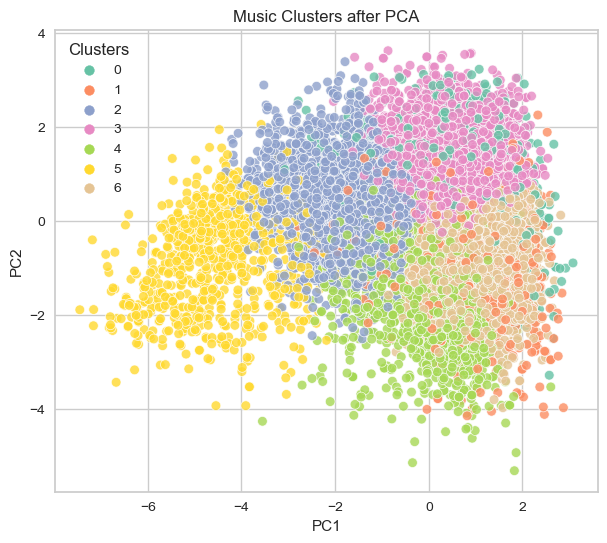

In [98]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_pca_fit, x='PC1', y='PC2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Music Clusters after PCA');

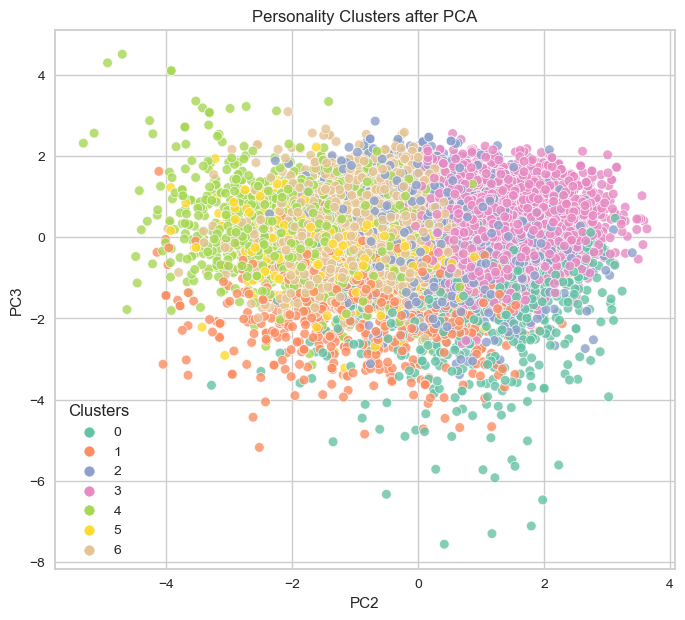

In [71]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_pca_fit, x='PC2', y='PC3', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

## FACTOR ANALYSIS

In [72]:
eigenvalues, eigenvectors = np.linalg.eig(corr)

sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

total_variance = np.sum(explained_variance_ratio)
variance_to_retain = 0.90
cumulative_variance = np.cumsum(explained_variance_ratio)

In [73]:
# Create a DataFrame to hold the table
dt = {'Principal Component': ['PC{}'.format(i) for i in range(1, len(eigenvalues) + 1)],
        'Eigenvalues': eigenvalues,
        'Proportion': explained_variance_ratio,
        'Cumulative': cumulative_variance}

df_table = pd.DataFrame(dt)

# Display the table
df_table


Principal Component  Eigenvalues  Proportion  Cumulative
0                  PC1     2.907508    0.264319    0.264319
1                  PC2     1.702404    0.154764    0.419083
2                  PC3     1.094368    0.099488    0.518571
3                  PC4     0.987102    0.089737    0.608308
4                  PC5     0.955783    0.086889    0.695197
5                  PC6     0.914418    0.083129    0.778326
6                  PC7     0.772586    0.070235    0.848561
7                  PC8     0.758000    0.068909    0.917470
8                  PC9     0.448946    0.040813    0.958283
9                 PC10     0.320494    0.029136    0.987419
10                PC11     0.138391    0.012581    1.000000

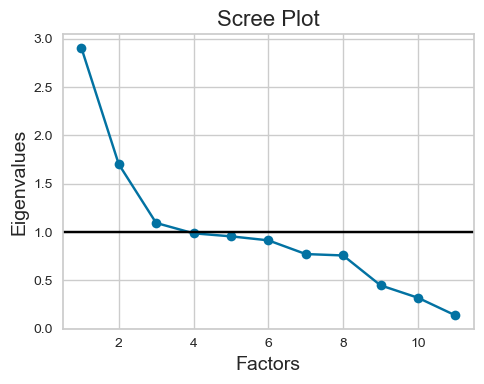

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scree plot
plt.figure(figsize=(5, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot', fontsize=16)
plt.xlabel('Factors', fontsize=14)
plt.ylabel('Eigenvalues', fontsize=14)

plt.axhline(1.0, color = 'black') #visualise which eigenvalues are above and below 1

# Show the scree plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3,rotation=None)
fa.fit(data)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [76]:
fa.get_communalities()

array([0.0395594 , 0.99719401, 0.88502582, 0.70709174, 0.03236125,
       0.74797388, 0.17234729, 0.04999147, 0.3133786 , 0.09303883,
       0.2295428 ])

In [77]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'],columns=['FA1','FA2','FA3']))

                       FA1       FA2       FA3
Variance          2.589289  1.369258  0.308958
Proportional Var  0.235390  0.124478  0.028087
Cumulative Var    0.235390  0.359868  0.387955


In [78]:
fa_load = pd.DataFrame(fa.loadings_,index=df.columns,columns=['FA1','FA2','FA3'])

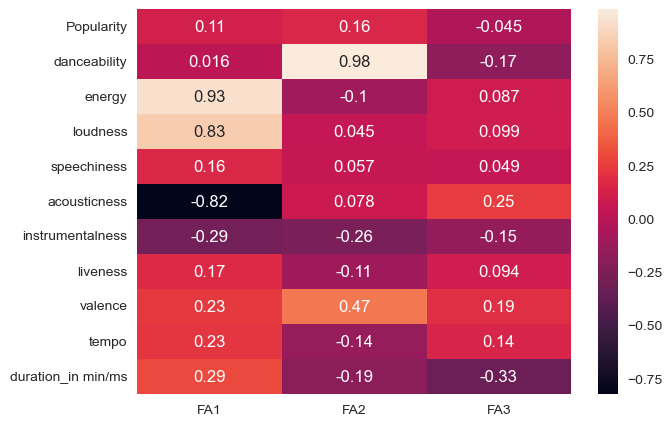

In [79]:
plt.figure(figsize=(7,5))
sns.heatmap(fa_load,annot=True)
plt.show()

In [80]:
df_fa_fit=pd.DataFrame(fa.transform(data),columns=['FA1','FA2','FA3'])
df_fa_fit

FA1       FA2       FA3
0      0.571378 -0.844607  0.093442
1     -0.315157 -0.323849  1.297828
2      1.060382 -2.074927  0.762053
3      1.255367 -1.627473  0.865917
4     -0.048051  0.899829  0.036537
...         ...       ...       ...
13301 -2.523330 -2.077611  0.546389
13302 -1.579843  0.689084 -0.077826
13303  1.140141  0.224021 -0.035224
13304  0.044473 -2.087860 -0.250996
13305  0.701689 -0.712493  0.186204

[13306 rows x 3 columns]

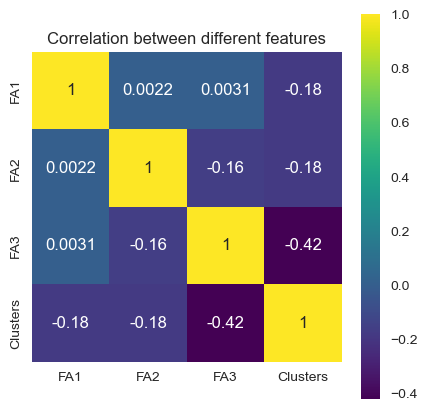

In [97]:
plt.figure(figsize=(5,5))
sns.heatmap(df_fa_fit.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different features')
plt.show()

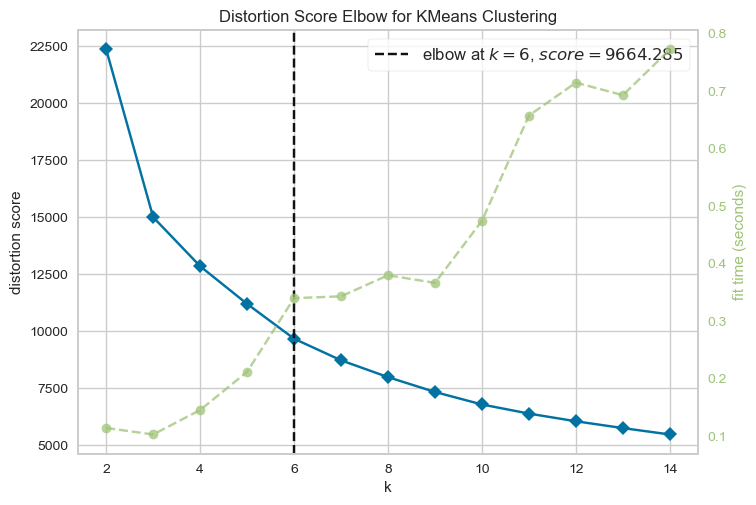

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
kmeans2 = KMeans()
visualizer1 = KElbowVisualizer(kmeans2, k=(2,15))
visualizer1.fit(df_fa_fit)
visualizer1.poof()

In [89]:
k_means_fa= KMeans(n_clusters = 6)
k_fit_fa = k_means_fa.fit(df_fa_fit)
centroids1 = k_fit_fa.cluster_centers_

pd.options.display.max_columns = 10
predictions1 = k_fit_fa.labels_
df_fa_fit['Clusters'] = predictions1
df_fa_fit.head()

FA1       FA2       FA3  Clusters
0  0.571378 -0.844607  0.093442         2
1 -0.315157 -0.323849  1.297828         0
2  1.060382 -2.074927  0.762053         2
3  1.255367 -1.627473  0.865917         2
4 -0.048051  0.899829  0.036537         3

In [90]:
df['Clusters'] = predictions1
df.head()

Popularity  danceability  energy  loudness  speechiness  ...  liveness  \
1        54.0         0.382   0.814    -7.230       0.0406  ...    0.1010   
2        35.0         0.434   0.614    -8.334       0.0525  ...    0.3940   
4        53.0         0.167   0.975    -4.279       0.2160  ...    0.1720   
5        53.0         0.235   0.977     0.878       0.1070  ...    0.1720   
6        48.0         0.674   0.658    -9.647       0.1040  ...    0.0981   

   valence    tempo  duration_in min/ms  Clusters  
1   0.5690  116.454            251733.0         2  
2   0.7870  147.681            109667.0         0  
4   0.0918  199.060            229960.0         2  
5   0.2410  152.952            208133.0         2  
6   0.6770  143.292            329387.0         3  

[5 rows x 12 columns]

In [91]:
df.groupby('Clusters').mean()

Popularity  danceability    energy   loudness  speechiness  ...  \
Clusters                                                              ...   
0          39.054326      0.563327  0.448069 -10.511808     0.062203  ...   
1          44.649404      0.531421  0.822888  -6.126146     0.066203  ...   
2          41.520694      0.313386  0.888805  -5.368204     0.094791  ...   
3          46.730934      0.730474  0.631392  -8.148611     0.081756  ...   
4          39.837150      0.382677  0.206663 -16.806279     0.043786  ...   
5          40.084551      0.342642  0.673138  -8.330066     0.052707  ...   

          instrumentalness  liveness   valence       tempo  duration_in min/ms  
Clusters                                                                        
0                 0.114810  0.181640  0.506057  119.011955       138252.998831  
1                 0.117005  0.217735  0.517288  125.222720       225424.524847  
2                 0.172940  0.250075  0.397495  142.148669       232944.139654  
3                 0.127567  0.164612  0.585039  116.595710       215139.102993  
4                 0.496359  0.142548  0.214970  108.451052       150180.325961  
5                 0.357737  0.189300  0.298852  122.361137       332574.734186  

[6 rows x 11 columns]

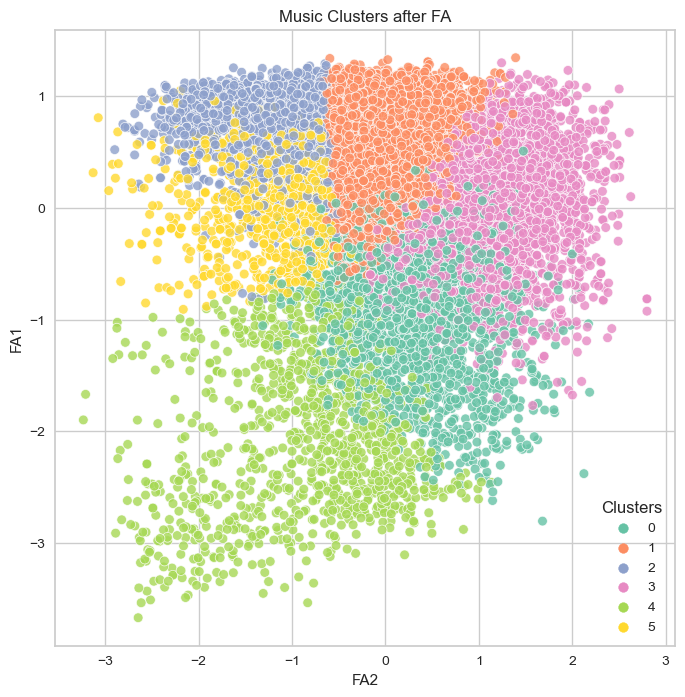

In [102]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_fa_fit, x='FA2' , y='FA1' , hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Music Clusters after FA');

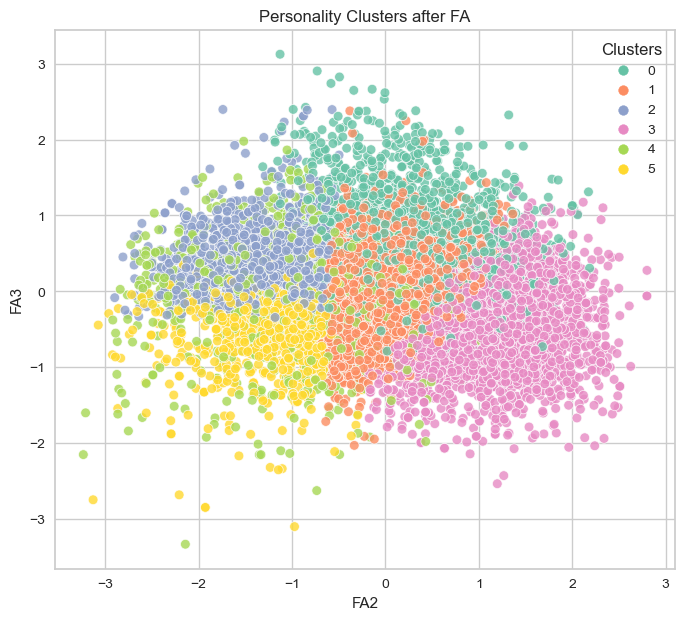

In [99]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_fa_fit, x='FA2' , y='FA3' , hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after FA');

In [110]:
df_fa_fit

FA1       FA2       FA3  Clusters
0      0.571378 -0.844607  0.093442         2
1     -0.315157 -0.323849  1.297828         0
2      1.060382 -2.074927  0.762053         2
3      1.255367 -1.627473  0.865917         2
4     -0.048051  0.899829  0.036537         3
...         ...       ...       ...       ...
13301 -2.523330 -2.077611  0.546389         4
13302 -1.579843  0.689084 -0.077826         0
13303  1.140141  0.224021 -0.035224         1
13304  0.044473 -2.087860 -0.250996         5
13305  0.701689 -0.712493  0.186204         2

[13306 rows x 4 columns]

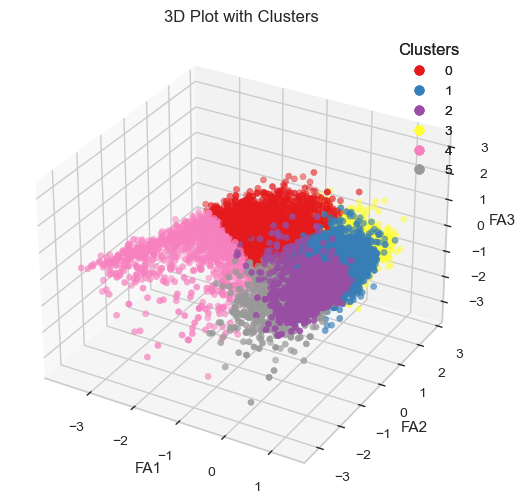

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter=ax.scatter(df_fa_fit['FA1'], df_fa_fit['FA2'], df_fa_fit['FA3'], c=df_fa_fit['Clusters'], cmap=plt.cm.Set1,marker='o')

# Set axis labels
ax.set_xlabel('FA1')
ax.set_ylabel('FA2')
ax.set_zlabel('FA3')

# Set plot title
ax.set_title('3D Plot with Clusters')

# Add a colorbar to show cluster assignments
legend = ax.legend(*scatter.legend_elements(),  title='Clusters')
ax.add_artist(legend)
# Show the plot
plt.show()


In [119]:
import plotly.express as px
fig = px.scatter_3d(df_fa_fit, x='FA1', y='FA2', z='FA3', color='Clusters', 
                    title='3D Plot with Clusters', opacity=0.7)

# Show the interactive plot
fig.show()